In [1]:
# Assume a dataset is sampled from a linear model, and assume the number of observations is 10,000. 
# Randomly construct a train and test set by dividing the observations into parts of 10% and 90% of the data points.
# Draw two curves below for fitting a linear model with quadratic loss to the data, 
# corresponding to the test and the train error, for a di↵erent number of problem parameters. 
# The true error is the error achieved if we sample an example from the true underlying distribution.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Seed for reproducibility
np.random.seed(0)

In [4]:
# 1. Generate a dataset with a linear relationship
# Assume a simple linear model y = ax + b with some noise
a, b = 5, -2
X = np.random.rand(10000, 1) * 10  # 10000 random numbers scaled up to 10
y = a * X.squeeze() + b + np.random.randn(10000) * 2  # Linear relation with noise

In [5]:
# 2. Split the dataset into a training set (90%) and a test set (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# We will store the training and testing errors in these lists
train_errors, test_errors = [], []

In [6]:
# 3. Fit linear models with increasing polynomial degrees and compute quadratic loss
for degree in range(1, 11):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_train_predict = model.predict(X_train_poly)
    y_test_predict = model.predict(X_test_poly)

    # Calculate the Quadratic Loss (Mean Squared Error)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

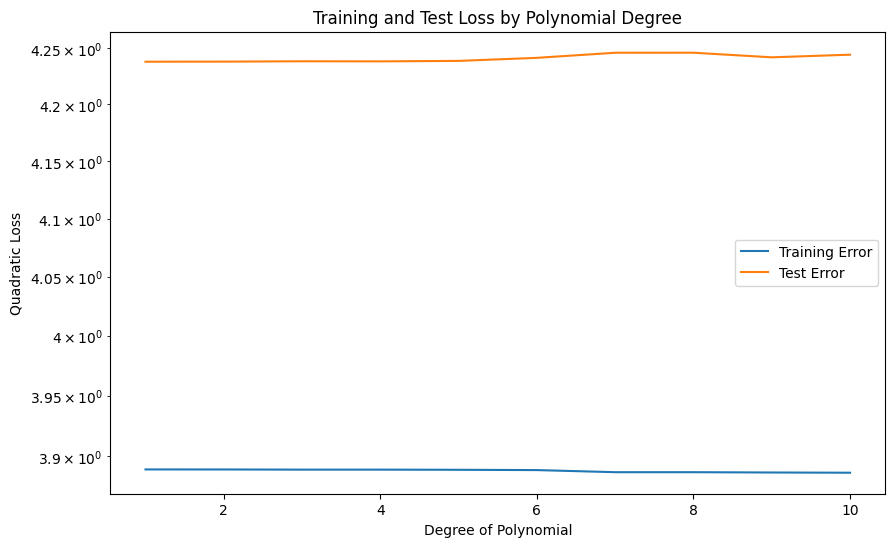

In [7]:
# 4. Plot the training and test errors
degrees = range(1, 11)
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.yscale('log')  # Using a log scale for better visibility
plt.xlabel('Degree of Polynomial')
plt.ylabel('Quadratic Loss')
plt.title('Training and Test Loss by Polynomial Degree')
plt.legend()
plt.show()
